In [6]:
import os
import pandas as pd
import numpy as np
import os
from pathlib import Path
from tqdm import tqdm
from PIL import Image

In [17]:
df = pd.read_csv('agesample2(0.00006).csv')

In [18]:
df.ans.value_counts()

0    5315
1    5268
2    2017
Name: ans, dtype: int64

In [89]:
i = -1

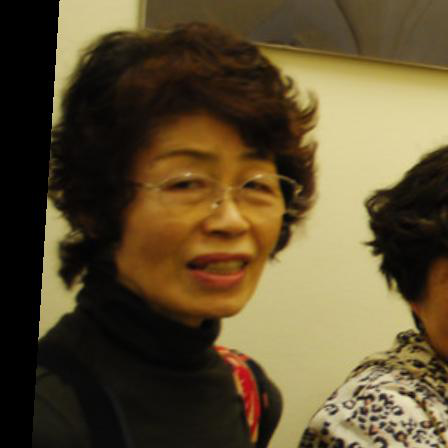

In [167]:
i += 1
while df.age.iloc[i] != 2:
    i += 1

path = df.path.iloc[i]
Image.open(df.path.iloc[i])

In [35]:
df_train_path = 'df/df_labled_train.csv'
df_valid_path = 'df/df_labled_valid.csv'
#df_test_path = '/opt/ml/input/data/eval/info.csv'

df_train = pd.read_csv(df_train_path)
df_valid = pd.read_csv(df_valid_path)
#df_test = pd.read_csv(df_test_path)

df = pd.concat([df_train, df_valid])

In [3]:
default_max_size=800
size = 300
padding = 0.5
cnn_face_detector = dlib.cnn_face_detection_model_v1('dlib_models/mmod_human_face_detector.dat')
sp = dlib.shape_predictor('dlib_models/shape_predictor_5_face_landmarks.dat')

In [4]:
outliers = []

for image_path in tqdm(df['path']):

    img = dlib.load_rgb_image(image_path)
    
    old_height, old_width, _ = img.shape
    
    if old_width > old_height:
        new_width, new_height = default_max_size, int(default_max_size * old_height / old_width)
    else:
        new_width, new_height =  int(default_max_size * old_width / old_height), default_max_size
    
    img = dlib.resize_image(img, rows=new_height, cols=new_width)
    dets = cnn_face_detector(img, 1)
    
    num_faces = len(dets)
    if num_faces != 1:
        outliers.append(image_path)
        continue

    faces = dlib.full_object_detections()

    for detection in dets:
        rect = detection.rect
        faces.append(sp(img, rect))

    images = dlib.get_face_chips(img, faces, size=size, padding = padding)

    for idx, image in enumerate(images):
        directory, name = image_path.rsplit('/', 1)
        directory = directory.replace('train', 'train_cropped')
        Path(directory).mkdir(parents=True, exist_ok=True)
        dlib.save_image(image, os.path.join(directory, name))        

  0%|          | 1/18900 [00:50<267:25:43, 50.94s/it]


KeyboardInterrupt: 

In [5]:
dlib.USE_CUDA

AttributeError: module 'dlib' has no attribute 'USE_CUDA'